## Frequent Category Imputation

In [2]:
import pandas as pd

df = pd.read_csv('HousePredictiontrainingDataSet.csv', usecols=['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

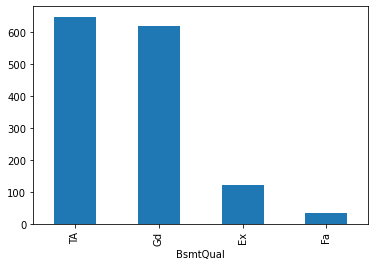

In [8]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

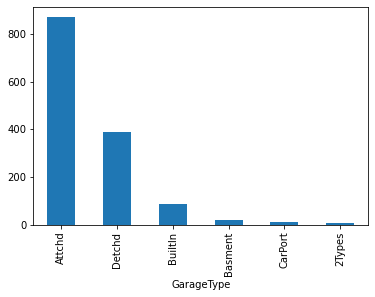

In [9]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

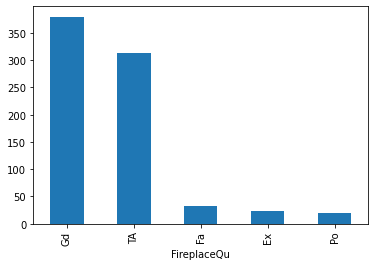

In [11]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [17]:
def impute_NaN(df, variable):
    most_Frequenctly_used_Category = df[variable].mode()[0]
    df[variable] = df[variable].fillna(most_Frequenctly_used_Category)

In [18]:
for feature in ['BsmtQual', 'FireplaceQu','GarageType','SalePrice']:
    impute_NaN(df, feature)

In [19]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Adding value for capture NaN

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('HousePredictiontrainingDataSet.csv', usecols=['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [22]:
df['BsmtQual'].mode()[0]

'TA'

In [25]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent, inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [26]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Create a new category Feature from NaN values

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('HousePredictiontrainingDataSet.csv', usecols=['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])

In [29]:
def impute_NaN(df, variable):
    df[variable + '_new'] = np.where(df[variable].isnull(),'missing',df[variable])

In [30]:
for feature in ['BsmtQual', 'FireplaceQu','GarageType','SalePrice']:
    impute_NaN(df, feature)

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new,SalePrice_new
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000
